In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill

from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from skfeature.function.similarity_based import fisher_score, reliefF
from skfeature.function.statistical_based import chi_square, f_score
from boruta import BorutaPy
from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression


%matplotlib inline
SEED=50

In [2]:
cns = pd.read_csv('cns.csv')
cns.head()

,x.AFFX.BioB.5.at,x.AFFX.BioB.M.at,x.AFFX.BioB.3.at,x.AFFX.BioC.5.at,x.AFFX.BioC.3.at,x.AFFX.BioDn.5.at,x.AFFX.BioDn.3.at,x.AFFX.CreX.5.at,x.AFFX.CreX.3.at,x.AFFX.BioB.5.st,...,x.U58516.at,x.U73738.at,x.X06956.at,x.X16699.at,x.X83863.at,x.Z17240.at,x.L49218.f.at,x.M71243.f.at,x.Z78285.f.at,y
1,-0.231140,-0.242715,-0.183060,-0.041937,-0.479553,-0.394078,0.039086,-0.291240,-0.228024,-0.100701,...,-0.050841,-0.309048,-0.261858,-0.197752,0.110761,0.069804,-0.193300,0.013711,-0.199087,2
2,-0.217881,-0.327010,-0.219228,-0.087645,-0.463983,-0.511138,0.144985,-0.428505,-0.194977,-0.262790,...,0.464738,-0.199019,0.025077,-0.254707,0.207858,-0.117734,-0.102015,0.096483,-0.191834,2
3,-0.308496,-0.256856,-0.299157,-0.197525,-0.239276,-0.283775,-0.120614,-0.360136,-0.140941,-0.166761,...,-0.004149,-0.084356,-0.233233,-0.227740,0.065071,-0.173902,-0.274436,-0.159619,-0.239276,2
4,-0.262352,-0.259978,-0.154330,-0.249294,-0.364042,-0.706703,-0.229510,-0.338323,-0.193107,-0.089043,...,0.463725,0.010669,-0.253647,-0.255625,0.405164,-0.132568,-0.175697,0.021353,-0.223575,2
5,-0.274458,-0.154017,-0.061023,-0.098712,-0.452661,-0.454710,-0.274458,-0.367451,-0.183922,-0.108544,...,0.068021,0.089733,-0.383428,-0.210960,0.016403,-0.112231,-0.308050,0.056141,-0.375645,2


In [3]:
print(cns.isnull().values.any())


False


In [4]:
features=cns.iloc[:,0:-1]
labels=cns.iloc[:,-1]

In [5]:
features.columns

Index(['x.AFFX.BioB.5.at', 'x.AFFX.BioB.M.at', 'x.AFFX.BioB.3.at',
       'x.AFFX.BioC.5.at', 'x.AFFX.BioC.3.at', 'x.AFFX.BioDn.5.at',
       'x.AFFX.BioDn.3.at', 'x.AFFX.CreX.5.at', 'x.AFFX.CreX.3.at',
       'x.AFFX.BioB.5.st',
       ...
       'x.U48730.at', 'x.U58516.at', 'x.U73738.at', 'x.X06956.at',
       'x.X16699.at', 'x.X83863.at', 'x.Z17240.at', 'x.L49218.f.at',
       'x.M71243.f.at', 'x.Z78285.f.at'],
      dtype='object', length=7128)

In [6]:
# Crear lista con nombres variables
feature_labels = list(features.columns)

In [7]:
type(features)

pandas.core.frame.DataFrame

In [8]:
feature_labels[0:10]

['x.AFFX.BioB.5.at',
 'x.AFFX.BioB.M.at',
 'x.AFFX.BioB.3.at',
 'x.AFFX.BioC.5.at',
 'x.AFFX.BioC.3.at',
 'x.AFFX.BioDn.5.at',
 'x.AFFX.BioDn.3.at',
 'x.AFFX.CreX.5.at',
 'x.AFFX.CreX.3.at',
 'x.AFFX.BioB.5.st']

In [9]:
# Estandarizar

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(features)

In [10]:
X

array([[0.76977144, 0.72460051, 0.73475917, ..., 0.82484924, 0.86478722,
        0.83183692],
       [0.79632123, 0.51901313, 0.65615052, ..., 1.        , 1.        ,
        0.8467659 ],
       [0.61487744, 0.69011213, 0.48243042, ..., 0.66917029, 0.58164346,
        0.74911813],
       ...,
       [0.43085597, 0.3112476 , 0.16300848, ..., 0.2510696 , 0.03330701,
        0.22218608],
       [0.58932403, 0.44619507, 0.72462594, ..., 0.9068894 , 0.85566845,
        0.85846072],
       [0.50712403, 0.40712679, 0.52396387, ..., 0.85344729, 0.83220874,
        0.80065326]])

In [11]:
Y = np.transpose(np.asarray(labels.values - 1, dtype=int))


In [12]:
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=labels,test_size=0.33, random_state=SEED)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 7128), (20, 7128), (40,), (20,))

# 1. SVC

In [15]:
# Elegir SVC Lineal

clf_svc = SVC(kernel='linear', C=1, probability=True, random_state=SEED) 

In [16]:
%%time
clf_svc.fit(X_train, y_train)

CPU times: user 325 ms, sys: 4.65 ms, total: 330 ms
Wall time: 82.3 ms


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=50,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_predict_svc = clf_svc.predict(X_test)
print ("Predicted Value:", y_predict_svc)

Predicted Value: [1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1]


In [18]:
# Precision del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_svc))

Accuracy: 0.7


In [19]:
print(metrics.classification_report(y_test,y_predict_svc))




              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.73      0.85      0.79        13

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20



# 2. NAIVE BAYES

In [20]:
# Crear clasificador Gaussiano

clf_nb = GaussianNB()

In [21]:
%%time
clf_nb.fit(X_train, y_train)

CPU times: user 21.7 ms, sys: 381 µs, total: 22.1 ms
Wall time: 5.48 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
#Predicciones

y_predict_nb = clf_nb.predict(X_test)
print ("Predicted Value:", y_predict_nb)

Predicted Value: [1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [23]:
# Precision

print("Accuracy:",metrics.accuracy_score(y_test, y_predict_nb))

Accuracy: 0.75


In [24]:
print(metrics.classification_report(y_test,y_predict_nb))



              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.72      1.00      0.84        13

    accuracy                           0.75        20
   macro avg       0.86      0.64      0.64        20
weighted avg       0.82      0.75      0.70        20



# 3. RANDOM FORESTS

In [25]:
# Crear clasificador

clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=5, random_state=SEED)



In [26]:
%%time
clf_rf.fit(X_train,y_train)



CPU times: user 330 ms, sys: 20.4 ms, total: 350 ms
Wall time: 139 ms


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=50, verbose=0, warm_start=False)

In [27]:
#Predicciones

y_predict_rf = clf_rf.predict(X_test)
print ("Predicted Value:", y_predict_rf)

Predicted Value: [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [28]:
# Precision

print("Accuracy:",metrics.accuracy_score(y_test, y_predict_rf))

Accuracy: 0.65


In [29]:
print(metrics.classification_report(y_test,y_predict_rf))


              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.67      0.92      0.77        13

    accuracy                           0.65        20
   macro avg       0.58      0.53      0.50        20
weighted avg       0.61      0.65      0.58        20



## SELECCIONAR VARIABLES USANDO PUNTUACION F

In [30]:
%%time
score_f = f_score.f_score(X_train, y_train)


CPU times: user 22.6 ms, sys: 180 µs, total: 22.7 ms
Wall time: 19.8 ms


In [31]:
score_f_df = pd.Series(score_f,index=features.columns.values).sort_values(ascending=False)


In [32]:
score_f_df.head(10)

x.U07563.cds1.at    15.634207
x.U34038.at         12.851574
x.Z11899.s.at       12.647165
x.U35048.at         11.276424
x.J02611.at         10.769984
x.U35139.at         10.646060
x.U82306.at         10.244439
x.U78876.at         10.067017
x.L05628.s.at        9.505626
x.X57129.at          9.422457
dtype: float64

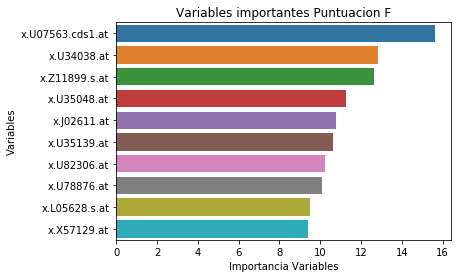

In [33]:
# Representacion grafica

sns.barplot(x=score_f_df[0:10,], y=score_f_df.index[0:10,])

plt.xlabel('Importancia Variables')
plt.ylabel('Variables')
plt.title("Variables importantes Puntuacion F")
plt.savefig("Variables Puntuacion F.pdf", dpi=300)
plt.show()

In [34]:
# Ordenar variables

idx_f = f_score.feature_ranking(score_f)
idx_f[0:10]

array([2670, 3075, 6719, 3088, 1053, 3091, 3833, 3745, 6031, 4301])

In [35]:
features.columns.values[[2670, 3075, 6719, 3088, 1053, 3091, 3833, 3745, 6031, 4301]]

array(['x.U07563.cds1.at', 'x.U34038.at', 'x.Z11899.s.at', 'x.U35048.at',
       'x.J02611.at', 'x.U35139.at', 'x.U82306.at', 'x.U78876.at',
       'x.L05628.s.at', 'x.X57129.at'], dtype=object)

In [36]:
# Especificar 10 variables

num_fea = 10
    
sel_f_train = X_train[:, idx_f[0:num_fea]]

sel_f_test = X_test[:, idx_f[0:num_fea]]

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [37]:
%%time
clf_svc_fsc = clf_svc.fit(sel_f_train, y_train)

CPU times: user 1.33 ms, sys: 91 µs, total: 1.42 ms
Wall time: 1.05 ms


In [38]:
%%time
clf_nb_fsc = clf_nb.fit(sel_f_train, y_train)

CPU times: user 1.75 ms, sys: 55 µs, total: 1.8 ms
Wall time: 1.3 ms


In [39]:
%%time
clf_rf_fsc = clf_rf.fit(sel_f_train, y_train)

CPU times: user 105 ms, sys: 17.2 ms, total: 123 ms
Wall time: 145 ms


In [40]:
y_fsc_predict_rf = clf_rf_fsc.predict(sel_f_test)
y_fsc_predict_nb = clf_nb_fsc.predict(sel_f_test)
y_fsc_predict_svc = clf_svc_fsc.predict(sel_f_test)

In [41]:
# Precision


print("Accuracy F1 Score SVC:",metrics.accuracy_score(y_test, y_fsc_predict_svc))
print("Accuracy F1 Score NB:",metrics.accuracy_score(y_test, y_fsc_predict_nb))
print("Accuracy F1 Score RF:",metrics.accuracy_score(y_test, y_fsc_predict_rf))

Accuracy F1 Score SVC: 0.65
Accuracy F1 Score NB: 0.7
Accuracy F1 Score RF: 0.65


In [42]:
print(metrics.classification_report(y_test,y_fsc_predict_svc))
print(metrics.classification_report(y_test,y_fsc_predict_nb))
print(metrics.classification_report(y_test,y_fsc_predict_rf))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.75      0.69      0.72        13

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.77      0.77      0.77        13

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



## SELECCIONAR VARIABLES USANDO CHI-CUADRADO

In [43]:
%%time
score_chi = chi_square.chi_square(X_train, y_train)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 5.07 ms


In [44]:
score_chi_df = pd.Series(score_chi,index=features.columns.values).sort_values(ascending=False)


In [45]:
score_chi_df.head(10)

x.J02611.at             2.279684
x.HG3431.HT3616.s.at    1.984059
x.U07563.cds1.at        1.649041
x.L27560.at             1.513892
x.HG4318.HT4588.s.at    1.499029
x.HG3543.HT3739.at      1.441188
x.J04080.at             1.396253
x.X76302.at             1.265272
x.U35048.at             1.216827
x.M25667.at             1.193368
dtype: float64

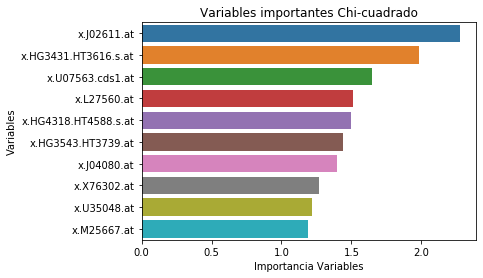

In [46]:
# Representacion grafica

sns.barplot(x=score_chi_df[0:10,], y=score_chi_df.index[0:10,])

plt.xlabel('Importancia Variables')
plt.ylabel('Variables')
plt.title("Variables importantes Chi-cuadrado")
plt.savefig("Variables importantes Chi-cuadrado.pdf", dpi=300)
plt.show()

In [47]:
# Ordenar variables

idx_chi = chi_square.feature_ranking(score_chi)
idx_chi[0:10]

array([1053, 5842, 2670, 1442, 5886, 5274, 1100, 4575, 3088, 6971])

In [48]:
features.columns.values[[1053, 5842, 2670, 1442, 5886, 5274, 1100, 4575, 3088, 6971]]

array(['x.J02611.at', 'x.HG3431.HT3616.s.at', 'x.U07563.cds1.at',
       'x.L27560.at', 'x.HG4318.HT4588.s.at', 'x.HG3543.HT3739.at',
       'x.J04080.at', 'x.X76302.at', 'x.U35048.at', 'x.M25667.at'],
      dtype=object)

In [49]:
# Especificar 10 variables

num_fea = 10
    
sel_chi_train = X_train[:, idx_chi[0:num_fea]]

sel_chi_test = X_test[:, idx_chi[0:num_fea]]


### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [50]:
%%time
clf_svc_chi = clf_svc.fit(sel_chi_train, y_train)

CPU times: user 1.02 ms, sys: 68 µs, total: 1.09 ms
Wall time: 743 µs


In [51]:
%%time
clf_nb_chi = clf_nb.fit(sel_chi_train, y_train)

CPU times: user 725 µs, sys: 49 µs, total: 774 µs
Wall time: 603 µs


In [52]:
%%time
clf_rf_chi = clf_rf.fit(sel_chi_train, y_train)

CPU times: user 134 ms, sys: 13 ms, total: 147 ms
Wall time: 133 ms


In [53]:
y_chi_predict_rf = clf_rf_chi.predict(sel_chi_test)
y_chi_predict_nb = clf_nb_chi.predict(sel_chi_test)
y_chi_predict_svc = clf_svc_chi.predict(sel_chi_test)

In [54]:
# Precision


print("Accuracy Chi-cuadrado SVC:",metrics.accuracy_score(y_test, y_chi_predict_svc))
print("Accuracy Chi-cuadrado NB:",metrics.accuracy_score(y_test, y_chi_predict_nb))
print("Accuracy Chi-cuadrado RF:",metrics.accuracy_score(y_test, y_chi_predict_rf))


Accuracy Chi-cuadrado SVC: 0.65
Accuracy Chi-cuadrado NB: 0.65
Accuracy Chi-cuadrado RF: 0.6


In [55]:
print(metrics.classification_report(y_test,y_chi_predict_svc))
print(metrics.classification_report(y_test,y_chi_predict_nb))
print(metrics.classification_report(y_test,y_chi_predict_rf))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20

              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.75      0.69      0.72        13

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.69      0.69      0.69        13

    accuracy                           0.60        20
   macro avg       0.56      0.56      0.56        20
weighted avg       0.60      0.60      0.60        20



## SELECCIONAR VARIABLES USANDO Fisher 

In [56]:
%%time
score_fisher = fisher_score.fisher_score(X_train, y_train)

CPU times: user 52.3 ms, sys: 290 µs, total: 52.6 ms
Wall time: 16 ms


In [57]:
score_fisher_df = pd.Series(score_fisher,index=features.columns.values).sort_values(ascending=False)


In [58]:
score_fisher_df.head(10)

x.U07563.cds1.at    0.411427
x.U34038.at         0.338199
x.Z11899.s.at       0.332820
x.U35048.at         0.296748
x.J02611.at         0.283421
x.U35139.at         0.280159
x.U82306.at         0.269590
x.U78876.at         0.264922
x.L05628.s.at       0.250148
x.X57129.at         0.247959
dtype: float64

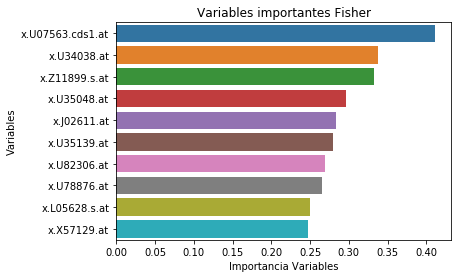

In [59]:
# Representacion grafica

sns.barplot(x=score_fisher_df[0:10,], y=score_fisher_df.index[0:10,])

plt.xlabel('Importancia Variables')
plt.ylabel('Variables')
plt.title("Variables importantes Fisher")
plt.savefig("Variables importantes Fisher.pdf", dpi=300)
plt.show()

In [60]:
features.columns.values[[2670, 3075, 6719, 3088, 1053, 3091, 3833, 3745, 6031, 4301]]

array(['x.U07563.cds1.at', 'x.U34038.at', 'x.Z11899.s.at', 'x.U35048.at',
       'x.J02611.at', 'x.U35139.at', 'x.U82306.at', 'x.U78876.at',
       'x.L05628.s.at', 'x.X57129.at'], dtype=object)

In [61]:
# Ordenar variables

idx_fisher = fisher_score.feature_ranking(score_fisher)
idx_fisher[0:10]

array([2670, 3075, 6719, 3088, 1053, 3091, 3833, 3745, 6031, 4301])

In [62]:
# Especificar 10 variables

num_fea = 10
    
sel_fisher_train = X_train[:, idx_fisher[0:num_fea]]

sel_fisher_test = X_test[:, idx_fisher[0:num_fea]]


### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [63]:
%%time
clf_svc_f = clf_svc.fit(sel_fisher_train, y_train)

CPU times: user 1.33 ms, sys: 86 µs, total: 1.41 ms
Wall time: 1.08 ms


In [64]:
%%time
clf_nb_f = clf_nb.fit(sel_fisher_train, y_train)

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 1.16 ms


In [65]:
%%time
clf_rf_f = clf_rf.fit(sel_fisher_train, y_train)

CPU times: user 92.5 ms, sys: 28.3 ms, total: 121 ms
Wall time: 143 ms


In [66]:
y_fisher_predict_rf = clf_rf_f.predict(sel_fisher_test)
y_fisher_predict_nb = clf_nb_f.predict(sel_fisher_test)
y_fisher_predict_svc = clf_svc_f.predict(sel_fisher_test)

In [67]:
# Precision


print("Accuracy Fisher SVC:",metrics.accuracy_score(y_test, y_fisher_predict_svc))
print("Accuracy Fisher NB:",metrics.accuracy_score(y_test, y_fisher_predict_nb))
print("Accuracy Fisher RF:",metrics.accuracy_score(y_test, y_fisher_predict_rf))


Accuracy Fisher SVC: 0.65
Accuracy Fisher NB: 0.7
Accuracy Fisher RF: 0.65


In [68]:
print(metrics.classification_report(y_test,y_fisher_predict_svc))
print(metrics.classification_report(y_test,y_fisher_predict_nb))
print(metrics.classification_report(y_test,y_fisher_predict_rf))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.75      0.69      0.72        13

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.77      0.77      0.77        13

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



## SELECCIONAR VARIABLES USANDO reliefF

In [69]:
%%time

score_relief = reliefF.reliefF(X_train, y_train, k=5)


CPU times: user 42.8 ms, sys: 170 µs, total: 43 ms
Wall time: 41.9 ms


In [70]:
score_relief

array([ 0.97748275,  1.18517819,  0.20225874, ..., -0.11452912,
       -0.33643507,  0.1844747 ])

In [71]:
score_relief_df = pd.Series(score_relief,index=features.columns.values).sort_values(ascending=False)


In [72]:
score_relief_df.head(20)

x.U07563.cds1.at             3.608279
x.U21858.at                  3.312530
x.M14328.s.at                3.169493
x.Z11899.s.at                3.098933
x.M32886.at                  3.008990
x.U25165.at                  2.762253
x.Z50022.at                  2.532475
x.U26403.at                  2.526985
x.X13293.at                  2.480808
x.X94703.at                  2.475575
x.U21936.at                  2.457847
x.U79751.at                  2.449975
x.HG3432.HT3620.s.at         2.433598
x.M20530.at                  2.411702
x.U00802.s.at                2.402206
x.AFFX.HSAC07.X00351.3.st    2.375704
x.L05425.at                  2.374156
x.K03008.cds1.at             2.363461
x.AF001787.s.at              2.338366
x.D43682.s.at                2.320372
dtype: float64

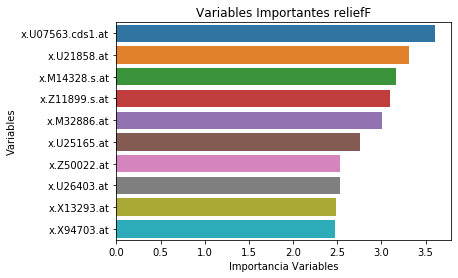

In [73]:
# Representar graficamente

sns.barplot(x=score_relief_df[0:10,], y=score_relief_df.index[0:10,])

plt.xlabel('Importancia Variables')
plt.ylabel('Variables')
plt.title("Variables Importantes reliefF")
plt.savefig("Variables importantes reliefF.pdf", dpi=300)

plt.show()

In [74]:
# Ordenar variables

idx_relief = reliefF.feature_ranking(score_relief)
idx_relief

array([2670, 2914, 6178, ..., 4340, 6612,  602])

In [75]:
idx_relief.shape

(7128,)

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [76]:
# Seleccionar 10:

num_fea = 10
    
sel_relief_train = X_train[:, idx_relief[0:num_fea]]

sel_relief_test = X_test[:, idx_relief[0:num_fea]]


In [77]:
sel_relief_train.shape

(40, 10)

In [78]:
%%time
clf_svc_rl = clf_svc.fit(sel_relief_train, y_train)

CPU times: user 1.28 ms, sys: 91 µs, total: 1.37 ms
Wall time: 927 µs


In [79]:
%%time
clf_nb_rl = clf_nb.fit(sel_relief_train, y_train)

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 831 µs


In [80]:
%%time
clf_rf_rl = clf_rf.fit(sel_relief_train, y_train)

CPU times: user 85.9 ms, sys: 20.5 ms, total: 106 ms
Wall time: 133 ms


In [81]:
y_rl_predict_svc = clf_svc_rl.predict(sel_relief_test)
y_rl_predict_nb = clf_nb_rl.predict(sel_relief_test)
y_rl_predict_rf = clf_rf_rl.predict(sel_relief_test)

In [82]:
# Precision

print("Accuracy reliefF SVC:",metrics.accuracy_score(y_test, y_rl_predict_svc))
print("Accuracy reliefF NB:",metrics.accuracy_score(y_test, y_rl_predict_nb))
print("Accuracy reliefF RF:",metrics.accuracy_score(y_test, y_rl_predict_rf))

Accuracy reliefF SVC: 0.65
Accuracy reliefF NB: 0.6
Accuracy reliefF RF: 0.6


In [83]:
# Metricas

print(metrics.classification_report(y_test,y_rl_predict_svc))
print(metrics.classification_report(y_test,y_rl_predict_nb))
print(metrics.classification_report(y_test,y_rl_predict_rf))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.69      0.85      0.76        13

    accuracy                           0.65        20
   macro avg       0.59      0.57      0.56        20
weighted avg       0.62      0.65      0.62        20

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.69      0.69      0.69        13

    accuracy                           0.60        20
   macro avg       0.56      0.56      0.56        20
weighted avg       0.60      0.60      0.60        20

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.67      0.77      0.71        13

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



## SELECCIONAR VARIABLES CON BORUTA

In [84]:
boruta_selector = BorutaPy(clf_rf, n_estimators='auto', verbose=0, random_state=SEED, max_iter = 100, perc = 99.5, alpha=0.01)


In [85]:
%%time
boruta_selector.fit(X_train, y_train)

CPU times: user 1min 58s, sys: 13.5 s, total: 2min 11s
Wall time: 1min 2s


BorutaPy(alpha=0.01,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=205, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x7ff3c5092b40>,
                                          verbose=0, warm_start=False),
         max_iter=

In [86]:
boruta_selector.n_features_

10

In [87]:
boruta_selector.support_

array([False, False, False, ..., False, False, False])

In [88]:
boruta_selector.ranking_


array([ 756, 1082, 5202, ..., 6543, 6543, 5202])

In [89]:
score_boruta_df = pd.Series(boruta_selector.ranking_,index=features.columns.values).sort_values(ascending=True)
score_boruta_df.head(11)

x.U66711.rna1.s.at    1
x.J02611.at           1
x.U35139.at           1
x.Z11899.s.at         1
x.K03008.cds1.at      1
x.U78876.at           1
x.M26692.s.at         1
x.M27281.at           1
x.U07563.cds1.at      1
x.M18728.at           1
x.U36759.s.at         2
dtype: int64

In [90]:
score_boruta_df.loc['x.J02611.at',]

1

In [91]:
sel_boruta_train = boruta_selector.transform(X_train)

sel_boruta_test = boruta_selector.transform(X_test)

In [92]:
print(sel_boruta_train.shape)
print(sel_boruta_test.shape)

(40, 10)
(20, 10)


### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [93]:
%%time
clf_svc_b = clf_svc.fit(sel_boruta_train, y_train)

CPU times: user 3.1 ms, sys: 349 µs, total: 3.45 ms
Wall time: 815 µs


In [94]:
%%time
clf_nb_b = clf_nb.fit(sel_boruta_train, y_train)

CPU times: user 3.86 ms, sys: 0 ns, total: 3.86 ms
Wall time: 950 µs


In [95]:
%%time
clf_rf_b = clf_rf.fit(sel_boruta_train, y_train)

CPU times: user 451 ms, sys: 37.8 ms, total: 489 ms
Wall time: 188 ms


In [96]:
y_boruta_predict_svc = clf_svc_b.predict(sel_boruta_test)
y_boruta_predict_nb = clf_nb_b.predict(sel_boruta_test)
y_boruta_predict_rf = clf_rf_b.predict(sel_boruta_test)

In [97]:
print("Accuracy Boruta SVC:",metrics.accuracy_score(y_test, y_boruta_predict_svc))
print("Accuracy Boruta NB:",metrics.accuracy_score(y_test, y_boruta_predict_nb))
print("Accuracy Boruta RF:",metrics.accuracy_score(y_test, y_boruta_predict_rf))

Accuracy Boruta SVC: 0.4
Accuracy Boruta NB: 0.55
Accuracy Boruta RF: 0.5


In [98]:
print(metrics.classification_report(y_test,y_boruta_predict_svc))
print(metrics.classification_report(y_test,y_boruta_predict_nb))
print(metrics.classification_report(y_test,y_boruta_predict_rf))

              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.55      0.46      0.50        13

    accuracy                           0.40        20
   macro avg       0.38      0.37      0.37        20
weighted avg       0.43      0.40      0.41        20

              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.64      0.69      0.67        13

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.53      0.55      0.54        20

              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.60      0.69      0.64        13

    accuracy                           0.50        20
   macro avg       0.40      0.42      0.40        20
weighted avg       0.46      0.50      0.48        20



## SELECCIONAR VARIABLES USANDO RFE (Eliminar recursivamente)

In [99]:
# RFE
rfe = RFE(estimator=clf_svc, n_features_to_select=10)



In [100]:
%%time
rfe = rfe.fit(X_train, y_train)
 


CPU times: user 18min 30s, sys: 14.7 s, total: 18min 44s
Wall time: 4min 41s


In [101]:
%%time

sel_rfe_train = rfe.transform(X_train)

sel_rfe_test = rfe.transform(X_test)

CPU times: user 1.41 ms, sys: 33 µs, total: 1.44 ms
Wall time: 767 µs


In [102]:
print(rfe.support_)
print(rfe.ranking_)

[False False False ... False False False]
[ 524  716 3262 ... 5009 5919 4850]


In [103]:
sel_rfe_train.shape

(40, 10)

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [104]:
%%time
clf_svc_r = clf_svc.fit(sel_rfe_train, y_train)

CPU times: user 1.25 ms, sys: 29 µs, total: 1.28 ms
Wall time: 973 µs


In [105]:
%%time
clf_nb_r = clf_nb.fit(sel_rfe_train, y_train)

CPU times: user 829 µs, sys: 0 ns, total: 829 µs
Wall time: 736 µs


In [106]:
%%time
clf_rf_r = clf_rf.fit(sel_rfe_train, y_train)

CPU times: user 154 ms, sys: 51.3 ms, total: 206 ms
Wall time: 165 ms


In [107]:
y_rfe_predict_svc = clf_svc_r.predict(sel_rfe_test)
y_rfe_predict_nb = clf_nb_r.predict(sel_rfe_test)
y_rfe_predict_rf = clf_rf_r.predict(sel_rfe_test)


In [108]:
# Precision

print("Accuracy SVC:",metrics.accuracy_score(y_test, y_rfe_predict_svc))
print("Accuracy NB:",metrics.accuracy_score(y_test, y_rfe_predict_nb))
print("Accuracy RF:",metrics.accuracy_score(y_test, y_rfe_predict_rf))

Accuracy SVC: 0.7
Accuracy NB: 0.6
Accuracy RF: 0.6


In [109]:
print(metrics.classification_report(y_test,y_rfe_predict_svc))
print(metrics.classification_report(y_test,y_rfe_predict_nb))
print(metrics.classification_report(y_test,y_rfe_predict_rf))



              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.71      0.92      0.80        13

    accuracy                           0.70        20
   macro avg       0.69      0.60      0.60        20
weighted avg       0.69      0.70      0.66        20

              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.65      0.85      0.73        13

    accuracy                           0.60        20
   macro avg       0.49      0.49      0.47        20
weighted avg       0.54      0.60      0.55        20

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.63      0.92      0.75        13

    accuracy                           0.60        20
   macro avg       0.32      0.46      0.37        20
weighted avg       0.41      0.60      0.49        20



In [110]:
pd.Series(rfe.ranking_,index=features.columns.values).sort_values(ascending=True).head(11)

x.U35139.at                    1
x.X97544.at                    1
x.U07563.cds1.at               1
x.U66406.at                    1
x.AFFX.HUMGAPDH.M33197.5.at    1
x.J02611.at                    1
x.U66711.rna1.s.at             1
x.U18383.s.at                  1
x.U39318.at                    1
x.U39226.at                    1
x.L10333.s.at                  2
dtype: int64

## SELECCIONAR VARIABLES USANDO SELECCION DE VARIABLES HACIA DELANTE

In [111]:
# Tarda mucho tiempo, incluso seleccionando solo 5 variables. Tiempos similares en Google collab.
sfs1 = sfs(clf_rf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='f1',
           n_jobs= -1,
           cv=0)



In [112]:
%%time
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 7128 out of 7128 | elapsed:  9.3min finished

[2019-10-09 21:17:35] Features: 1/10

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 7120 out of 7120 | elapsed:  9.3min finished

[2019-10-09 22:31:59] Features: 9/10 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | ela

CPU times: user 1h 31min 40s, sys: 49 s, total: 1h 32min 29s
Wall time: 1h 33min 3s



[2019-10-09 22:41:18] Features: 10/10 -- score: 1.0

In [113]:
# Mostrar variables seleccionadas

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [114]:
sfs1.k_score_

1.0

In [115]:
features.columns.values[[0,1,2,3,4]]

array(['x.AFFX.BioB.5.at', 'x.AFFX.BioB.M.at', 'x.AFFX.BioB.3.at',
       'x.AFFX.BioC.5.at', 'x.AFFX.BioC.3.at'], dtype=object)

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [116]:
%%time
clf_svc_sfs = clf_svc.fit(X_train[:, feat_cols], y_train)

CPU times: user 1.38 ms, sys: 16 µs, total: 1.4 ms
Wall time: 989 µs


In [117]:
%%time
clf_rf_sfs = clf_rf.fit(X_train[:, feat_cols], y_train)

CPU times: user 189 ms, sys: 32.2 ms, total: 222 ms
Wall time: 184 ms


In [118]:
%%time
clf_nb_sfs = clf_nb.fit(X_train[:, feat_cols], y_train)

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 1.03 ms


In [119]:
y_sfs_predict_svc = clf_svc_sfs.predict(X_test[:, feat_cols])
y_sfs_predict_nb = clf_nb_sfs.predict(X_test[:, feat_cols])
y_sfs_predict_rf = clf_rf_sfs.predict(X_test[:, feat_cols])

In [120]:
# Precision

print("Accuracy SVC:",metrics.accuracy_score(y_test, y_sfs_predict_svc))
print("Accuracy NB:",metrics.accuracy_score(y_test, y_sfs_predict_nb))
print("Accuracy RF:",metrics.accuracy_score(y_test, y_sfs_predict_rf))

Accuracy SVC: 0.65
Accuracy NB: 0.55
Accuracy RF: 0.5


In [121]:
y_train_sfs_pred_svc = clf_svc_sfs.predict(X_train[:, feat_cols])
print('Training accuracy SVC on selected features: %.3f' % metrics.accuracy_score(y_train, y_train_sfs_pred_svc))
y_train_sfs_pred_nb = clf_nb_sfs.predict(X_train[:, feat_cols])
print('Training accuracy NB on selected features: %.3f' % metrics.accuracy_score(y_train, y_train_sfs_pred_nb))
y_train_sfs_pred_rf = clf_rf_sfs.predict(X_train[:, feat_cols])
print('Training accuracy RF on selected features: %.3f' % metrics.accuracy_score(y_train, y_train_sfs_pred_rf))

Training accuracy SVC on selected features: 0.650
Training accuracy NB on selected features: 0.725
Training accuracy RF on selected features: 1.000


In [122]:
# Metricas

print(metrics.classification_report(y_test,y_sfs_predict_svc))
print(metrics.classification_report(y_test,y_sfs_predict_nb))
print(metrics.classification_report(y_test,y_sfs_predict_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20

              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.70      0.54      0.61        13

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.59      0.55      0.56        20

              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.62      0.62      0.62        13

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.50      0.50      0.50        20



/home/nacho/anaconda3/envs/tfm/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SELECCIONAR VARIABLES USANDO ARBOLES DE DECISION

In [123]:
# Nombre e importancia para cada variables

#for feature in zip(feature_labels, clf_rf.feature_importances_):
 #   print(feature)

In [124]:
%%time

sfm = SelectFromModel(clf_rf, max_features=10, threshold=-np.inf)
sfm.fit(X_train, y_train)

CPU times: user 251 ms, sys: 36.3 ms, total: 287 ms
Wall time: 186 ms


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight='balanced',
                                                 criterion='gini', max_depth=5,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=205, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=<mtrand.RandomState object at 0x7ff3c5092b40>,
                    

In [125]:
# Imprimir variables importantes

l=[]
for feature_list_index in sfm.get_support(indices=True):
    feat = (feature_labels[feature_list_index])
    l.append(feat)

In [126]:
l

['x.D83243.at',
 'x.M24248.at',
 'x.M27281.at',
 'x.U07563.cds1.at',
 'x.U68031.at',
 'x.X57129.at',
 'x.X74295.at',
 'x.AB006781.s.at',
 'x.D43682.s.at',
 'x.X79200.at']

In [127]:

sel_rf_train = sfm.transform(X_train)
sel_rf_test = sfm.transform(X_test)

In [128]:
print(sel_rf_train.shape)
sel_rf_test.shape

(40, 10)


(20, 10)

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [129]:
%%time
clf_svc_rf = clf_svc.fit(sel_rf_train, y_train)

CPU times: user 4.94 ms, sys: 57 µs, total: 4.99 ms
Wall time: 2.74 ms


In [130]:
%%time
clf_nb_rf = clf_nb.fit(sel_rf_train, y_train)

CPU times: user 2.39 ms, sys: 20 µs, total: 2.41 ms
Wall time: 1.76 ms


In [131]:
%%time
clf_rf_rf = clf_rf.fit(sel_rf_train, y_train)

CPU times: user 165 ms, sys: 36.3 ms, total: 201 ms
Wall time: 163 ms


In [132]:
y_rf_predict_svc = clf_svc_rf.predict(sel_rf_test)
y_rf_predict_nb = clf_nb_rf.predict(sel_rf_test)
y_rf_predict_rf = clf_rf_rf.predict(sel_rf_test)

In [133]:
# Precision

print("Accuracy DT SVC:",metrics.accuracy_score(y_test, y_rf_predict_svc))
print("Accuracy DT NB:",metrics.accuracy_score(y_test, y_rf_predict_nb))
print("Accuracy DT RF:",metrics.accuracy_score(y_test, y_rf_predict_rf))

Accuracy DT SVC: 0.65
Accuracy DT NB: 0.7
Accuracy DT RF: 0.55


In [134]:
# Metricas

print(metrics.classification_report(y_test,y_rf_predict_svc))
print(metrics.classification_report(y_test,y_rf_predict_nb))
print(metrics.classification_report(y_test,y_rf_predict_rf))


              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.77      0.77      0.77        13

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20

              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.62      0.77      0.69        13

    accuracy                           0.55        20
   macro avg       0.44      0.46      0.44        20
weighted avg       0.49      0.55      0.51        20



## SELECCIONAR VARIABLES USANDO LOGISTIC REGRESSION Y L1

In [135]:
%%time

sfm = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'), max_features=10, threshold=-np.inf)


CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 29.1 µs


In [136]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=10, norm_order=1, prefit=False, threshold=-inf)

In [137]:
# Imprimir variables importantes

l=[]
for feature_list_index in sfm.get_support(indices=True):
    feat = (feature_labels[feature_list_index])
    l.append(feat)

In [138]:
l

['x.J02611.at',
 'x.U07563.cds1.at',
 'x.U35139.at',
 'x.U39318.at',
 'x.X76302.at',
 'x.X77197.at',
 'x.L10333.s.at',
 'x.U66711.rna1.s.at',
 'x.Z11899.s.at',
 'x.K03189.f.at']

In [139]:

sel_l1_train = sfm.transform(X_train)
sel_l1_test = sfm.transform(X_test)

In [140]:
print(sel_l1_train.shape)
sel_l1_test.shape

(40, 10)


(20, 10)

### Entrenar modelo con variables seleccionadas en conjunto de entrenamiento

In [141]:
%%time
clf_svc_l1 = clf_svc.fit(sel_l1_train, y_train)

CPU times: user 1.27 ms, sys: 15 µs, total: 1.28 ms
Wall time: 990 µs


In [142]:
%%time
clf_nb_l1 = clf_nb.fit(sel_l1_train, y_train)

CPU times: user 989 µs, sys: 12 µs, total: 1 ms
Wall time: 880 µs


In [143]:
%%time
clf_rf_l1 = clf_rf.fit(sel_l1_train, y_train)

CPU times: user 161 ms, sys: 40.2 ms, total: 201 ms
Wall time: 168 ms


In [144]:
y_l1_predict_svc = clf_svc_l1.predict(sel_l1_test)
y_l1_predict_nb = clf_nb_l1.predict(sel_l1_test)
y_l1_predict_rf = clf_rf_l1.predict(sel_l1_test)

In [145]:
# Precision

print("Accuracy L1 SVC:",metrics.accuracy_score(y_test, y_l1_predict_svc))
print("Accuracy L1 NB:",metrics.accuracy_score(y_test, y_l1_predict_nb))
print("Accuracy L1 RF:",metrics.accuracy_score(y_test, y_l1_predict_rf))

Accuracy L1 SVC: 0.75
Accuracy L1 NB: 0.7
Accuracy L1 RF: 0.7


In [146]:
# Metricas

print(metrics.classification_report(y_test,y_l1_predict_svc))
print(metrics.classification_report(y_test,y_l1_predict_nb))
print(metrics.classification_report(y_test,y_l1_predict_rf))


              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.75      0.92      0.83        13

    accuracy                           0.75        20
   macro avg       0.75      0.68      0.69        20
weighted avg       0.75      0.75      0.73        20

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.73      0.85      0.79        13

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.73      0.85      0.79        13

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20



In [147]:
dill.dump_session('CNS.db')


In [148]:
dill.load_session('CNS.db')
